# Importing files and Libraries

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
calls_df = pd.read_csv('calls.csv')
customers_df = pd.read_csv('customers.csv')
reasons_df = pd.read_csv('reasons.csv')
sentiment_df = pd.read_csv('sentiment_statistics.csv')

# Data Cleaning

In [148]:
## Removing missing,dublicates (if any), outliers etc

In [149]:
print(calls_df.isnull().sum())


call_id                        0
customer_id                    0
agent_id                       0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
Unnamed: 7                 71810
AHT                        71809
AST                        71810
dtype: int64


In [153]:
# Assuming 0 means no loyalty status
customers_df['elite_level_code'] = customers_df['elite_level_code'].fillna(0)

In [155]:
 # Replace NaN with mean sentiment
sentiment_df['average_sentiment'] = sentiment_df['average_sentiment'].fillna(sentiment_df['average_sentiment'].mean())


In [157]:
# Fill missing agent_tone with the most frequent value (mode)
mode_value = sentiment_df['agent_tone'].mode()[0]
sentiment_df['agent_tone'] = sentiment_df['agent_tone'].fillna(mode_value)


In [159]:
calls_df.drop(columns=['Unnamed: 7','AHT','AST'],inplace=True)

In [161]:
# Check for missing values-> ALl DATA GET CLEANED
print(calls_df.isnull().sum())
print(customers_df.isnull().sum())
print(reasons_df.isnull().sum())
print(sentiment_df.isnull().sum())

call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64
customer_id         0
customer_name       0
elite_level_code    0
dtype: int64
call_id                0
primary_call_reason    0
dtype: int64
call_id                    0
agent_id                   0
agent_tone                 0
customer_tone              0
average_sentiment          0
silence_percent_average    0
dtype: int64


In [163]:
## Converting data_types
# Convert date columns to datetime type
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

In [165]:
# Convert elite_level_code to categorical type
customers_df['elite_level_code'] = customers_df['elite_level_code'].astype('category')


In [167]:
# Handling Outliers
# Calculate AHT and AST
calls_df['AHT'] = (calls_df['call_end_datetime'] - calls_df['agent_assigned_datetime']).dt.total_seconds()/60
calls_df['AST'] = (calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()/60

#AHT average handle time 

In [169]:
import seaborn as sns

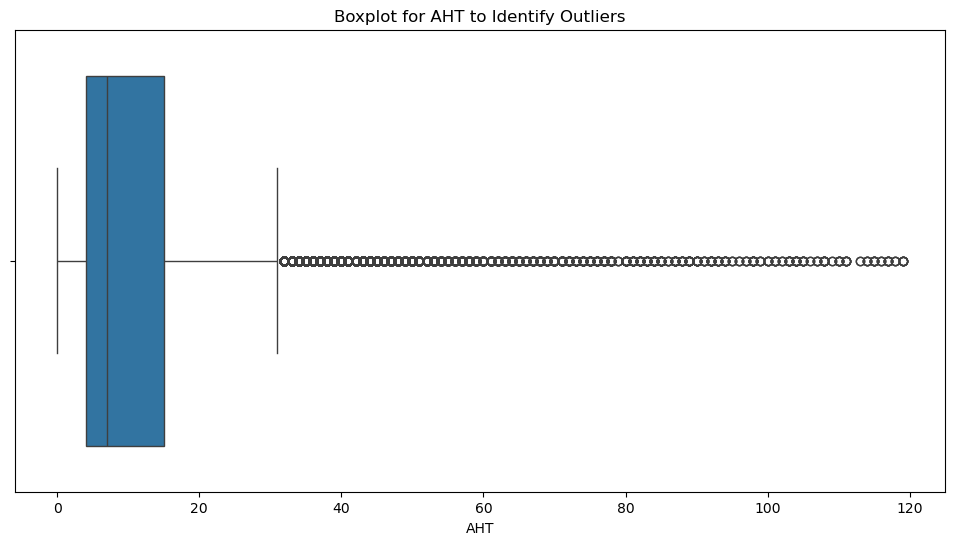

In [171]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=calls_df['AHT'])
plt.title('Boxplot for AHT to Identify Outliers')
plt.show()

In [173]:
# Removing outliers (for instance, using IQR method)
Q1 = calls_df['AHT'].quantile(0.25)
Q3 = calls_df['AHT'].quantile(0.75)
IQR = Q3 - Q1

In [175]:
# Filter out outliers
calls_df = calls_df[~((calls_df['AHT'] < (Q1 - 1.5 * IQR)) | (calls_df['AHT'] > (Q3 + 1.5 * IQR)))]

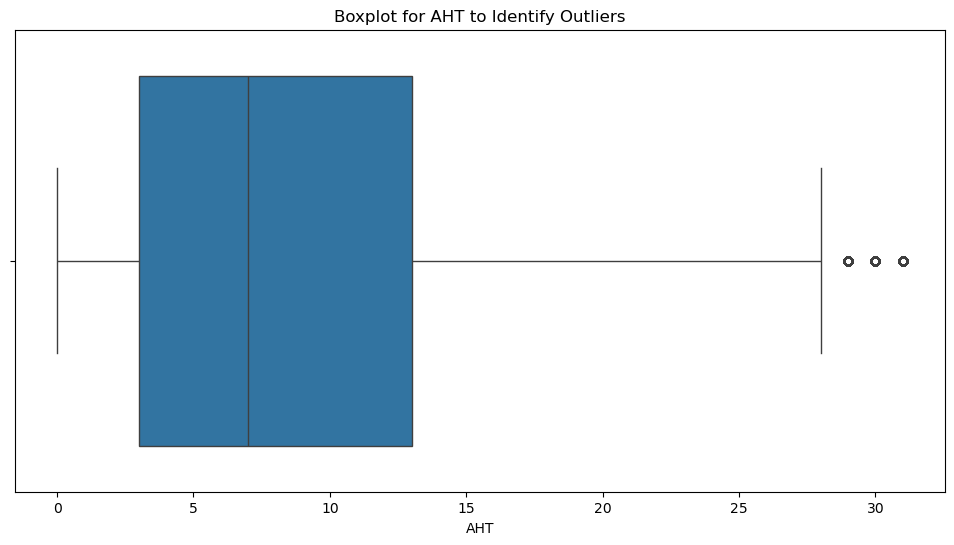

In [177]:
# Boxplot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=calls_df['AHT'])
plt.title('Boxplot for AHT to Identify Outliers')
plt.show() 

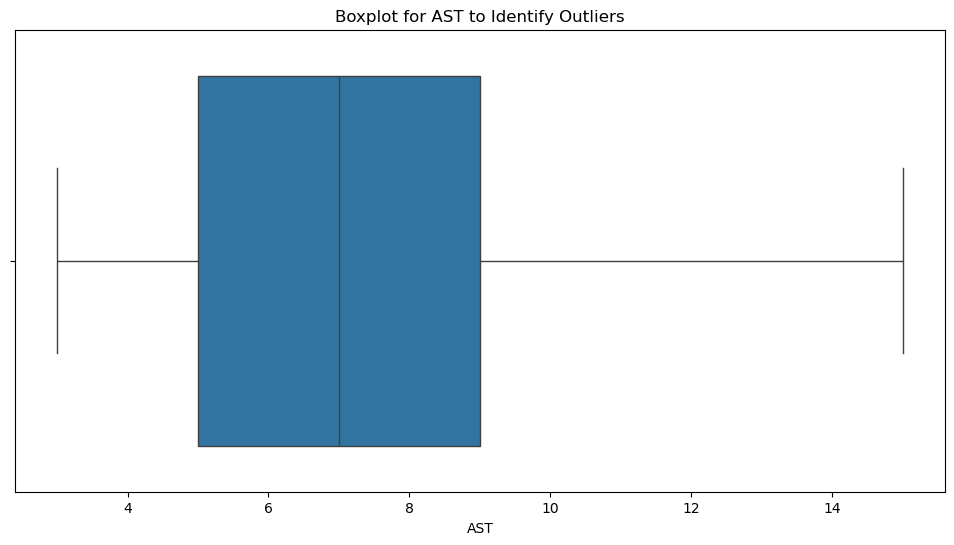

In [179]:
# Boxplot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=calls_df['AST'])
plt.title('Boxplot for AST to Identify Outliers')
plt.show()

In [181]:
# Standardizing call transcripts (convert to lowercase)
calls_df['call_transcript'] = calls_df['call_transcript'].str.lower()

# Clean customer names by stripping whitespace
customers_df['customer_name'] = customers_df['customer_name'].str.strip()

In [236]:
#Merging all the files available into one df

In [183]:
merged_df= calls_df.merge(reasons_df, on='call_id', how='left')

In [185]:
merged_df=merged_df.merge(customers_df,on='customer_id',how='left')

In [187]:
merged_df=merged_df.merge(sentiment_df,on='call_id',how='left')

In [189]:
merged_df = merged_df.rename(columns={'agent_id_x': 'agent_id'})

In [191]:
merged_df.drop(columns=['agent_id_y'],inplace=True)

In [193]:
print(merged_df.duplicated().sum())

0


In [195]:
merged_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST,primary_call_reason,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nagent: thank you for calling united airlin...,31.0,7.0,Voluntary Cancel,Matthew Foster,4.0,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nagent: thank you for calling united airlin...,12.0,3.0,Booking,Tammy Walters,0.0,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nagent: thank you for calling united airlin...,19.0,8.0,IRROPS,Jeffery Dixon,0.0,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nagent: thank you for calling united airlin...,7.0,5.0,Upgrade,David Wilkins,2.0,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nagent: thank you for calling united airlin...,9.0,10.0,Seating,Elizabeth Daniels,0.0,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66758,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nagent: thank you for calling united airlin...,28.0,9.0,Post Flight,Dennis Singleton DDS,0.0,calm,calm,0.05,0.34
66759,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nagent: thank you for calling united airlin...,8.0,3.0,Upgrade,Paul Mitchell,1.0,calm,frustrated,0.03,0.22
66760,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nagent: thank you for calling united airlin...,6.0,6.0,Upgrade,Kaylee Lang,0.0,calm,polite,0.05,0.42
66761,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-09-01 00:03:00,\n\nagent: thank you for calling united airlin...,4.0,6.0,NaN,Christine Oneal,1.0,neutral,polite,-0.07,0.13


# Exploratory Data Analysis(EDA)

In [241]:
# Step 1:Cleaning Call Transcripts by Removing Stopwords and Punctuation

In [197]:

import nltk
from nltk.corpus import stopwords
import string

# Load stopwords and define punctuation set
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Define a function to clean the transcripts
def clean_transcript(text):
    # Tokenize the text
    words = nltk.word_tokenize(text.lower())
    # Remove stopwords and punctuation
    cleaned_words = [word for word in words if word not in stop_words and word not in punctuation]
    return ' '.join(cleaned_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hii\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [203]:
# Apply cleaning function to the call_transcript column
merged_df['cleaned_transcript'] = merged_df['call_transcript'].apply(clean_transcript)

# Display the cleaned transcripts
print(merged_df[['cleaned_transcript', 'primary_call_reason']].head())

                                  cleaned_transcript primary_call_reason
0  agent thank calling united airlines customer s...   Voluntary  Cancel
1  agent thank calling united airlines name sam h...             Booking
2  agent thank calling united airlines customer s...              IRROPS
3  agent thank calling united airlines customer s...             Upgrade
4  agent thank calling united airlines customer s...             Seating


In [207]:
# Step 2: Text Mining Using TF-IDF

In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the cleaned transcripts using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['cleaned_transcript'])

# Convert the matrix into a DataFrame for easy analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add the primary_call_reason to the DataFrame for reference
tfidf_df['primary_call_reason'] = merged_df['primary_call_reason'].values

# Display the TF-IDF matrix
print(tfidf_df.head())


      agent     ahead  airlines   alright  anything  appreciate  available  \
0  0.271222  0.000000  0.092113  0.071125  0.000000    0.060503   0.073886   
1  0.282567  0.048421  0.035987  0.055575  0.044232    0.047276   0.057732   
2  0.248195  0.000000  0.028098  0.000000  0.034535    0.073822   0.135225   
3  0.277519  0.042272  0.031417  0.145552  0.038615    0.041272   0.000000   
4  0.302892  0.046137  0.034290  0.000000  0.084291    0.045045   0.055009   

       back    better    booked  ...       way  wednesday      week   welcome  \
0  0.081171  0.200165  0.060632  ...  0.000000   0.000000  0.000000  0.000000   
1  0.126850  0.000000  0.047376  ...  0.113706   0.000000  0.000000  0.042326   
2  0.049520  0.000000  0.000000  ...  0.044389   0.000000  0.101295  0.066093   
3  0.000000  0.045514  0.124079  ...  0.049633   0.143637  0.000000  0.036951   
4  0.000000  0.099350  0.045141  ...  0.054171   0.000000  0.061809  0.080658   

       well    within      work     would   

In [211]:
# Step 3: Grouping Call Reasons Based on Transcripts

In [213]:
# Group by 'primary_call_reason' and calculate the mean TF-IDF scores for each keyword
reason_grouped_tfidf = tfidf_df.groupby('primary_call_reason').mean()

# Display the top words associated with each call reason
print(reason_grouped_tfidf.head())


                        agent     ahead  airlines   alright  anything  \
primary_call_reason                                                     
 Baggage             0.283825  0.054973  0.046117  0.047238  0.052310   
Baggage              0.286255  0.051148  0.046629  0.040486  0.056144   
Baggage              0.282154  0.055114  0.043116  0.044169  0.049879   
Booking              0.285584  0.051309  0.046746  0.040714  0.053845   
Booking              0.280438  0.043481  0.050140  0.041842  0.050028   

                     appreciate  available      back    better    booked  ...  \
primary_call_reason                                                       ...   
 Baggage               0.042329   0.032794  0.051353  0.066927  0.058429  ...   
Baggage                0.041583   0.042040  0.043501  0.055069  0.066568  ...   
Baggage                0.047101   0.039566  0.039332  0.052542  0.074216  ...   
Booking                0.041985   0.040982  0.043654  0.055464  0.066770  ...   
Bo

In [215]:
# Step 4: Analyzing Keyword Frequency

In [217]:
# Function to get top N keywords for each call reason
def get_top_keywords(call_reason, n=10):
    keywords = reason_grouped_tfidf.loc[call_reason].sort_values(ascending=False)
    return keywords.head(n)

# Example: Get top 10 keywords for the 'Baggage' call reason
top_keywords_baggage = get_top_keywords('Baggage', 10)
print("Top keywords for Baggage issues:")
print(top_keywords_baggage)


Top keywords for Baggage issues:
flight      0.317009
agent       0.286255
customer    0.277538
change      0.170925
let         0.153529
help        0.102829
would       0.100436
like        0.100375
thank       0.094615
get         0.089081
Name: Baggage, dtype: float64


In [219]:
# Step 5: Sentiment Analysis of Call Transcripts

In [221]:
import nltk
nltk.download('brown')
nltk.download('punkt')


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Hii\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hii\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [231]:
!pip install textblob


In [232]:
from textblob import TextBlob

# Define a function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the cleaned transcripts
merged_df['sentiment'] = merged_df['cleaned_transcript'].apply(get_sentiment)

# Group by primary_call_reason and calculate average sentiment for each reason
reason_sentiment = merged_df.groupby('primary_call_reason')['sentiment'].mean()

# Display the average sentiment for each call reason
print(reason_sentiment)


primary_call_reason
 Baggage                   0.220335
Baggage                    0.221091
Baggage                    0.229090
Booking                    0.221846
Booking                    0.217468
Check In                   0.215130
Check-In                   0.216949
Check-In                   0.233110
Checkout                   0.210800
Checkout                   0.243115
Communications             0.216974
Communications             0.225390
Digital   Support          0.211471
Digital  Support           0.218445
Digital Support            0.216938
Digital Support            0.191022
Disability                 0.216303
Disability                 0.179079
ETC                        0.214238
ETC                        0.191705
IRROPS                     0.212931
IRROPS                     0.214278
Mileage   Plus             0.215171
Mileage  Plus              0.209272
Mileage Plus               0.218432
Mileage Plus               0.232118
Other  Topics              0.219813
Other To

In [233]:
#Step 6: Visualize Results-> By plotting bar graph and wordcloud

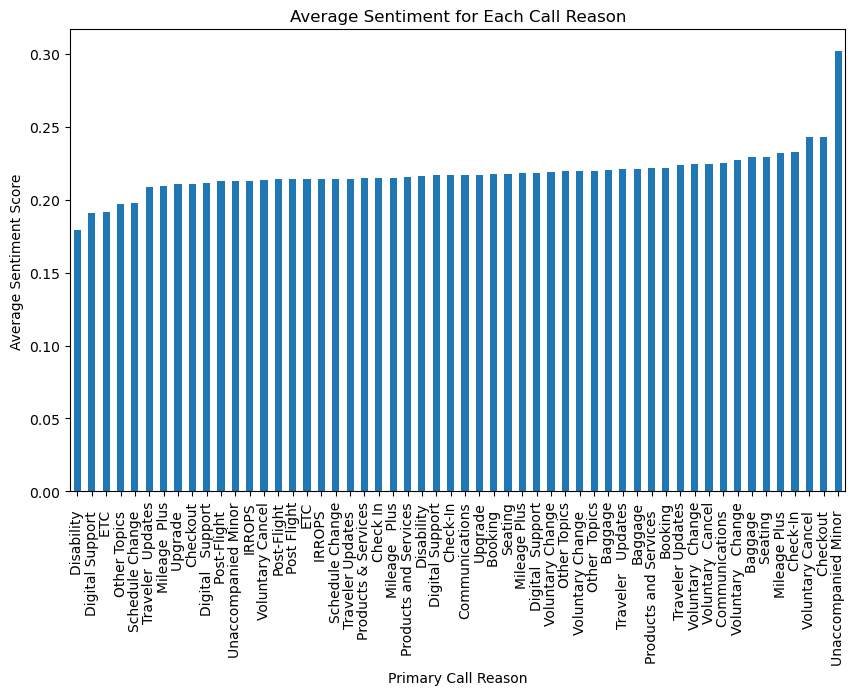

In [234]:
# Plot average sentiment for each call reason
plt.figure(figsize=(10,6))
reason_sentiment.sort_values().plot(kind='bar')
plt.title('Average Sentiment for Each Call Reason')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Primary Call Reason')
plt.xticks(rotation=90)
plt.show()

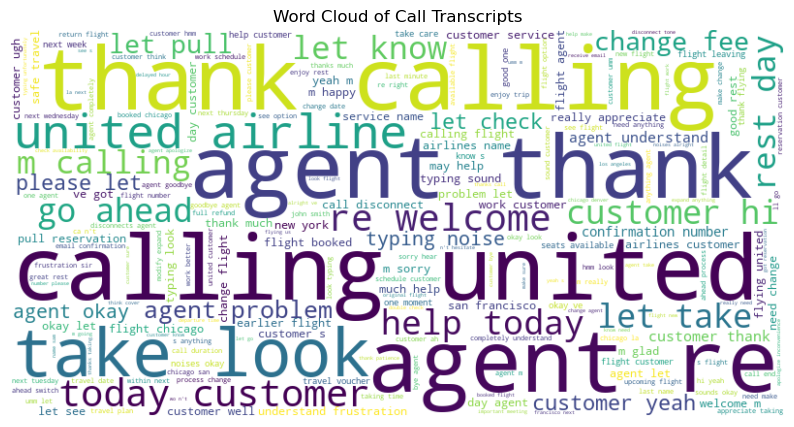

In [113]:
from wordcloud import WordCloud

# Generate a word cloud for the entire corpus
all_words = ' '.join(merged_df['cleaned_transcript'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Call Transcripts')
plt.show()